# Comparing old vs new calculated AF2 metric
Created 2025-04-08

The AF2 metrics were recalculated. This notebooks checks for potential errors

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Literal
import matplotlib.pyplot as plt
from matplotlib.axes._axes import Axes

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
# Settings

# Path to resource folder with the structures and metadata tables
path_resources = Path(r"D:\Eigene Datein\dev\Uni\JGU Bio Bachelorthesis\Daten\resources")

path_AF2 = path_resources / "AF2"
path_solved = path_resources / "solved"


In [4]:
dataAF_new = pd.read_csv(path_AF2 / "AF2_metrics.tsv", sep="\t")
display(dataAF_new)

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,salt_bridges,hbonds,hydrophobic_interactions
0,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,312,5,A,B,165.0,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0.0,10.0,3.0
1,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,312,5,A,B,165.0,...,0.979658,0.880716,0.418230,1.100588,0.050000,613.651,6.063,0.0,9.0,0.0
2,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,312,5,A,B,165.0,...,0.969753,0.883186,0.641834,1.776257,0.185185,323.304,5.092,0.0,2.0,9.0
3,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,312,5,A,B,165.0,...,1.260424,0.475511,1.686332,5.358800,0.363636,853.680,5.658,11.0,12.0,6.0
4,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,312,5,A,B,165.0,...,1.759591,0.223400,2.928606,9.908745,0.888889,851.771,5.691,9.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,60,113,B,B,392.0,...,5.341712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3176,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,60,113,B,B,392.0,...,5.975135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3177,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,60,113,B,B,392.0,...,5.962444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3178,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,60,113,B,B,392.0,...,5.901696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataAF_old = pd.read_csv(path_AF2 / "John metrics" / "AF_metrics_all_structures.tsv", sep="\t")
display(dataAF_old)

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,num_align_resi_domain,RMSD_backbone_peptide,RMSD_all_atom_peptide,known_motif_plddt,DockQ,iRMS,LRMS,Fnonnat,num_mutation_in_motif,label
0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,312.0,1.592504,1.859964,NaN,0.878,0.604,1.575,0.087,known minimal,1
1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,312.0,1.133857,1.553759,NaN,0.881,0.418,1.101,0.050,known minimal,1
2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,312.0,1.792767,2.100310,NaN,0.883,0.642,1.776,0.185,known minimal,1
3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,312.0,5.357927,6.558613,NaN,0.476,1.686,5.359,0.364,known minimal,1
4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,312.0,9.901379,11.882125,NaN,0.223,2.929,9.909,0.889,known minimal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3176,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3177,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3178,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0


In [10]:
dataAF = pd.merge(
    left=dataAF_new,
    right=dataAF_old,
    left_on=[dataAF_new["prediction_name"].str.lower(), "model_id"],
    right_on=[dataAF_old["prediction_name"].str.lower(), "model_id"],
    how="outer",
    suffixes=["", "_old"]
)
dataAF.drop(columns=["key_0"], inplace=True)
display(dataAF)

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,num_align_resi_domain_old,RMSD_backbone_peptide_old,RMSD_all_atom_peptide_old,known_motif_plddt,DockQ_old,iRMS,LRMS,Fnonnat_old,num_mutation_in_motif,label
0,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_0,189,59,A,B,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
1,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_1,189,59,A,B,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
2,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_2,189,59,A,B,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_3,189,59,A,B,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
4,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_4,189,59,A,B,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark,run43,mutations_DMI,TRG_PTS1_2C0L_NAKL.NAKD,ranked_0,305,4,A,B,335.0,...,292.0,0.826363,1.399703,NaN,NaN,NaN,NaN,NaN,1,0
3176,AlphaFold_benchmark,run43,mutations_DMI,TRG_PTS1_2C0L_NAKL.NAKD,ranked_1,305,4,A,B,335.0,...,292.0,0.792342,1.373096,NaN,NaN,NaN,NaN,NaN,1,0
3177,AlphaFold_benchmark,run43,mutations_DMI,TRG_PTS1_2C0L_NAKL.NAKD,ranked_2,305,4,A,B,335.0,...,292.0,1.008063,1.504804,NaN,NaN,NaN,NaN,NaN,1,0
3178,AlphaFold_benchmark,run43,mutations_DMI,TRG_PTS1_2C0L_NAKL.NAKD,ranked_3,305,4,A,B,335.0,...,292.0,1.058342,1.498733,NaN,NaN,NaN,NaN,NaN,1,0


In [11]:
# Missmatched rows
display(dataAF[np.logical_or(dataAF["project_name"].isnull(), dataAF["project_name_old"].isnull())])

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,num_align_resi_domain_old,RMSD_backbone_peptide_old,RMSD_all_atom_peptide_old,known_motif_plddt,DockQ_old,iRMS,LRMS,Fnonnat_old,num_mutation_in_motif,label


In [12]:
for c in ["num_align_atoms_domain", "RMSD_domain", "RMSD_all_atom_peptide", "DockQ"]:
    dataAF[f"delta_{c}"] = dataAF.apply(lambda r: r[c] - r[f"{c}_old"], axis=1)

dataAF[f"delta_RMSD_domain_same_align"] = dataAF.apply(lambda r: r["delta_RMSD_domain"] if r["delta_num_align_atoms_domain"] == 0 else None, axis=1)
dataAF[f"delta_RMSD_aa_peptide_same_align"] = dataAF.apply(lambda r: r["delta_RMSD_all_atom_peptide"] if np.abs(r["delta_RMSD_domain_same_align"]) <= 0.01 else None, axis=1)

In [ ]:
dataAF[["prediction_name", "model_id", "benchmark_set", "delta_num_align_atoms_domain", "num_align_atoms_domain", "num_align_atoms_domain_old", "delta_RMSD_domain", "delta_RMSD_domain_same_align"]]

,prediction_name,model_id,benchmark_set,delta_num_align_atoms_domain,num_align_atoms_domain,num_align_atoms_domain_old,delta_RMSD_domain,delta_RMSD_domain_same_align
0,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_0,random_DDI,NaN,1420.0,NaN,NaN,NaN
1,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_1,random_DDI,NaN,1420.0,NaN,NaN,NaN
2,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_2,random_DDI,NaN,1420.0,NaN,NaN,NaN
3,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_3,random_DDI,NaN,1420.0,NaN,NaN,NaN
4,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_4,random_DDI,NaN,1420.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3175,TRG_PTS1_2C0L_NAKL.NAKD,ranked_0,mutations_DMI,0.0,2280.0,2280.0,0.0,0.0
3176,TRG_PTS1_2C0L_NAKL.NAKD,ranked_1,mutations_DMI,0.0,2280.0,2280.0,0.0,0.0
3177,TRG_PTS1_2C0L_NAKL.NAKD,ranked_2,mutations_DMI,0.0,2280.0,2280.0,0.0,0.0
3178,TRG_PTS1_2C0L_NAKL.NAKD,ranked_3,mutations_DMI,0.0,2280.0,2280.0,0.0,0.0


In [14]:
dataAF[["prediction_name", "model_id", "benchmark_set", "delta_RMSD_all_atom_peptide", "delta_RMSD_aa_peptide_same_align", "delta_RMSD_domain", "delta_num_align_atoms_domain"]]

,prediction_name,model_id,benchmark_set,delta_RMSD_all_atom_peptide,delta_RMSD_aa_peptide_same_align,delta_RMSD_domain,delta_num_align_atoms_domain
0,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_0,random_DDI,NaN,NaN,NaN,NaN
1,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_1,random_DDI,NaN,NaN,NaN,NaN
2,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_2,random_DDI,NaN,NaN,NaN,NaN
3,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_3,random_DDI,NaN,NaN,NaN,NaN
4,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_4,random_DDI,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3175,TRG_PTS1_2C0L_NAKL.NAKD,ranked_0,mutations_DMI,0.0,0.0,0.0,0.0
3176,TRG_PTS1_2C0L_NAKL.NAKD,ranked_1,mutations_DMI,0.0,0.0,0.0,0.0
3177,TRG_PTS1_2C0L_NAKL.NAKD,ranked_2,mutations_DMI,0.0,0.0,0.0,0.0
3178,TRG_PTS1_2C0L_NAKL.NAKD,ranked_3,mutations_DMI,0.0,0.0,0.0,0.0


In [15]:
dataAF[["prediction_name", "model_id", "benchmark_set", "delta_DockQ", "delta_num_align_atoms_domain"]]

,prediction_name,model_id,benchmark_set,delta_DockQ,delta_num_align_atoms_domain
0,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_0,random_DDI,NaN,NaN
1,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_1,random_DDI,NaN,NaN
2,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_2,random_DDI,NaN,NaN
3,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_3,random_DDI,NaN,NaN
4,D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34,ranked_4,random_DDI,NaN,NaN
...,...,...,...,...,...
3175,TRG_PTS1_2C0L_NAKL.NAKD,ranked_0,mutations_DMI,NaN,0.0
3176,TRG_PTS1_2C0L_NAKL.NAKD,ranked_1,mutations_DMI,NaN,0.0
3177,TRG_PTS1_2C0L_NAKL.NAKD,ranked_2,mutations_DMI,NaN,0.0
3178,TRG_PTS1_2C0L_NAKL.NAKD,ranked_3,mutations_DMI,NaN,0.0


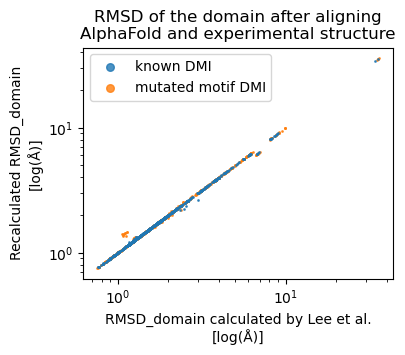

In [16]:
# RMSD domain

plt.figure(figsize=(4,3))

rows = dataAF[(~dataAF["delta_RMSD_domain"].isna()) & (dataAF["benchmark_set"] == "known_DMI")]
x, y = rows["RMSD_domain_old"], rows["RMSD_domain"]
plt.scatter(x, y, alpha=0.8, s=1, label = "known DMI", zorder=11)

rows = dataAF[(~dataAF["delta_RMSD_domain"].isna()) & (dataAF["benchmark_set"] == "mutations_DMI")]
x, y = rows["RMSD_domain_old"], rows["RMSD_domain"]
plt.scatter(x, y, alpha=0.8, s=1, label = "mutated motif DMI", zorder=10)

plt.xlabel("RMSD_domain calculated by Lee et al.\n[log(Å)]")
plt.ylabel("Recalculated RMSD_domain\n[log(Å)]")
plt.xscale("log")
plt.yscale("log")
plt.title("RMSD of the domain after aligning\nAlphaFold and experimental structure")
lgnd = plt.legend(scatterpoints=1, fontsize=10)
lgnd.legend_handles[0]._sizes = [30]
lgnd.legend_handles[1]._sizes = [30]
plt.savefig("export.svg")
plt.show()


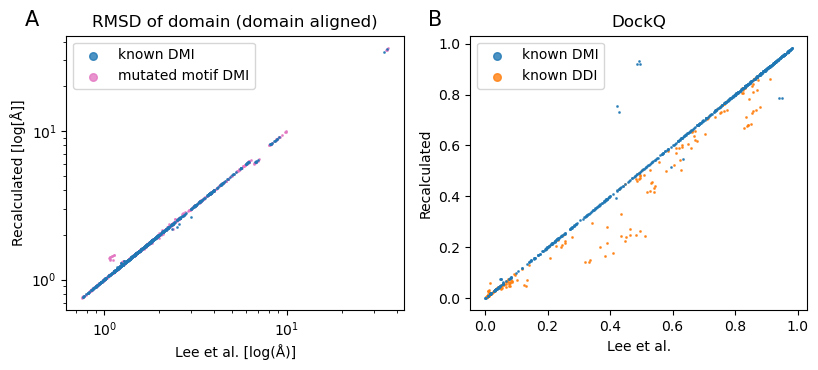

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8.3,3.8))
axes: list[Axes] = axes

rows = dataAF[(~dataAF["delta_RMSD_domain"].isna()) & (dataAF["benchmark_set"] == "known_DMI")]
x, y = rows["RMSD_domain_old"], rows["RMSD_domain"]
axes[0].scatter(x, y, alpha=0.8, s=1, c="tab:blue", label = "known DMI", zorder=11)

rows = dataAF[(~dataAF["delta_RMSD_domain"].isna()) & (dataAF["benchmark_set"] == "mutations_DMI")]
x, y = rows["RMSD_domain_old"], rows["RMSD_domain"]
axes[0].scatter(x, y, alpha=0.8, s=1, c="tab:pink", label = "mutated motif DMI", zorder=10)

rows = dataAF[(~dataAF["delta_DockQ"].isna()) & (dataAF["benchmark_set"] == "known_DMI")]
x, y = rows["DockQ_old"], rows["DockQ"]
axes[1].scatter(x, y, alpha=0.8, s=1, c="tab:blue", label = "known DMI", zorder=11)

rows = dataAF[(~dataAF["delta_DockQ"].isna()) & (dataAF["benchmark_set"] == "known_DDI")]
x, y = rows["DockQ_old"], rows["DockQ"]
axes[1].scatter(x, y, alpha=0.8, s=1, c="tab:orange", label = "known DDI", zorder=10)

axes[0].set_title("RMSD of domain (domain aligned)")
axes[1].set_title("DockQ")
axes[0].set_xlabel("Lee et al. [log(Å)]")
axes[1].set_xlabel("Lee et al.")
axes[0].set_ylabel("Recalculated [log[Å]]")
axes[1].set_ylabel("Recalculated")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
lgnd = axes[0].legend(scatterpoints=1, fontsize=10)
lgnd.legend_handles[0]._sizes = [30]
lgnd.legend_handles[1]._sizes = [30]
lgnd = axes[1].legend(scatterpoints=1, fontsize=10)
lgnd.legend_handles[0]._sizes = [30]
lgnd.legend_handles[1]._sizes = [30]

from matplotlib.transforms import ScaledTranslation
axes[0].text(x=0.0, y=1.0, s="A", transform=(axes[0].transAxes + ScaledTranslation(-30/72, +7/72, fig.dpi_scale_trans)), fontsize=15)
axes[1].text(x=0.0, y=1.0, s="B", transform=(axes[1].transAxes + ScaledTranslation(-30/72, +7/72, fig.dpi_scale_trans)), fontsize=15)


plt.tight_layout()
plt.savefig("export.svg")
plt.show()


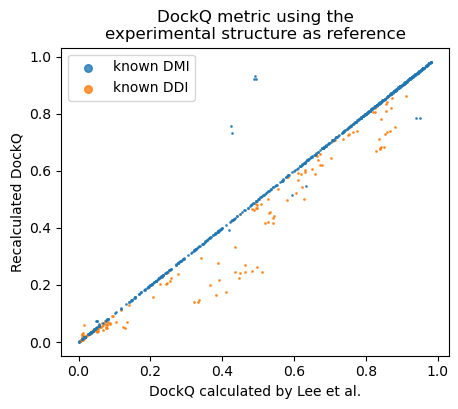

In [20]:
# Dock Q

plt.figure(figsize=(5,4))

rows = dataAF[(~dataAF["delta_DockQ"].isna()) & (dataAF["benchmark_set"] == "known_DMI")]
x, y = rows["DockQ_old"], rows["DockQ"]
plt.scatter(x, y, alpha=0.8, s=1, label = "known DMI", zorder=11)

rows = dataAF[(~dataAF["delta_DockQ"].isna()) & (dataAF["benchmark_set"] == "known_DDI")]
x, y = rows["DockQ_old"], rows["DockQ"]
plt.scatter(x, y, alpha=0.8, s=1, label = "known DDI", zorder=10)



plt.xlabel("DockQ calculated by Lee et al.")
plt.ylabel("Recalculated DockQ")
plt.title("DockQ metric using the\nexperimental structure as reference")
lgnd = plt.legend(scatterpoints=1, fontsize=10)
lgnd.legend_handles[0]._sizes = [30]
lgnd.legend_handles[1]._sizes = [30]
plt.savefig("export.svg")
plt.show()


In [53]:
compare_columns = ["RMSD_domain", "RMSD_backbone_peptide", "RMSD_all_atom_peptide", "DockQ"]
benchmark_sets = ["known_DMI", "random_DMI", "mutations_DMI", "known_DDI", "random_DDI"]
RMSD_old = {c:{b:[] for b in benchmark_sets} for c in compare_columns}
RMSD_new = {c:{b:[] for b in benchmark_sets} for c in compare_columns}

for i, row_new in dataAF_new.iterrows():
    prediction_name = row_new["prediction_name"]
    model_id = row_new["model_id"]
    benchmark_set = row_new["benchmark_set"]

    if len(row_old := dataAF_old[np.logical_and(dataAF_old["prediction_name"].str.lower() == prediction_name.lower(), dataAF_old["model_id"] == model_id)]) == 0:
        print(f"\t{bcolors.FAIL}{prediction_name} {model_id} does not exist{bcolors.ENDC}")
        continue

    for c in compare_columns:
        RMSD_new[c][benchmark_set].append(row_new[c])
        RMSD_old[c][benchmark_set].append(row_old[c].item())

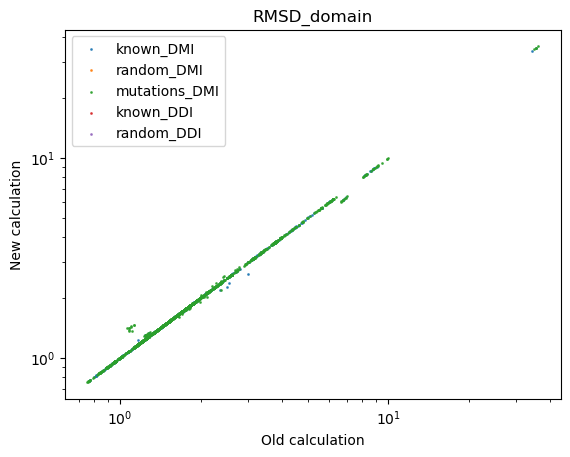

c:\Users\abril\dev\programs\minconda\envs\bachelor01\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


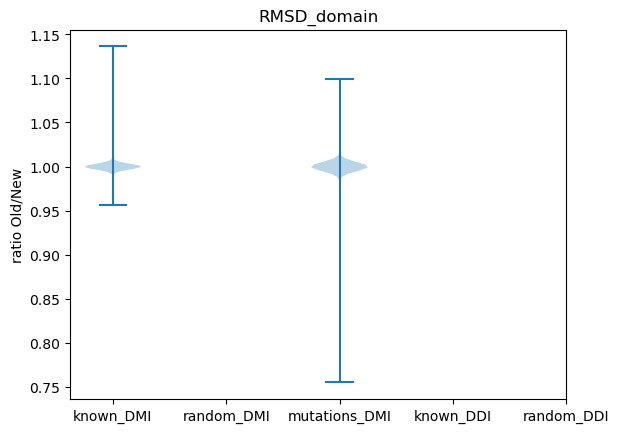

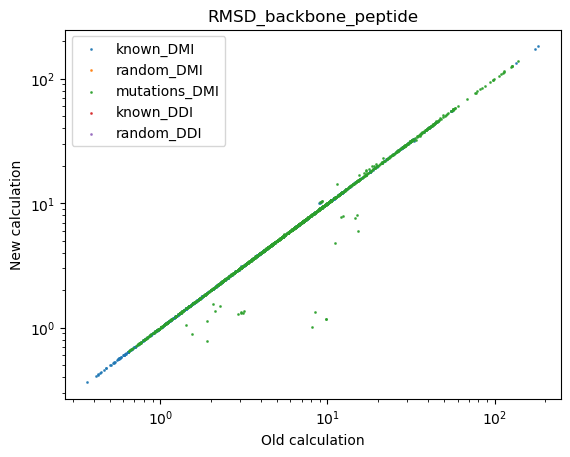

c:\Users\abril\dev\programs\minconda\envs\bachelor01\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


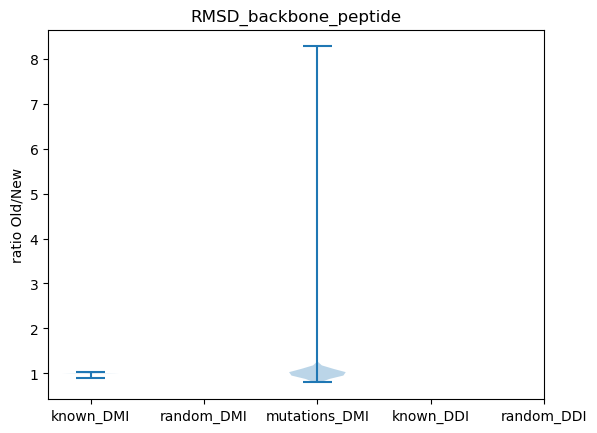

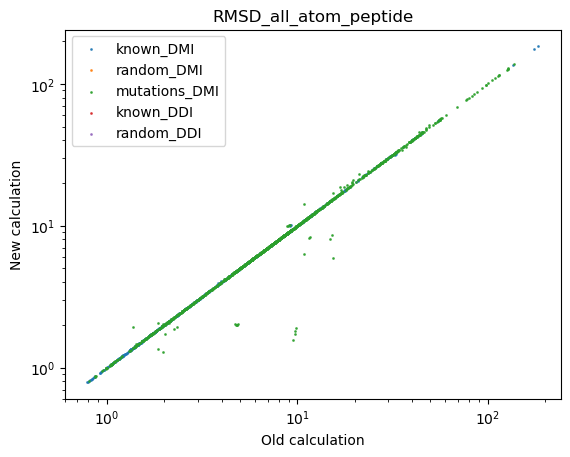

c:\Users\abril\dev\programs\minconda\envs\bachelor01\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


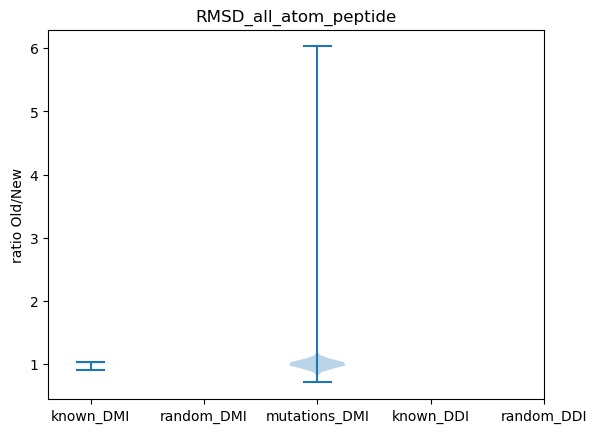

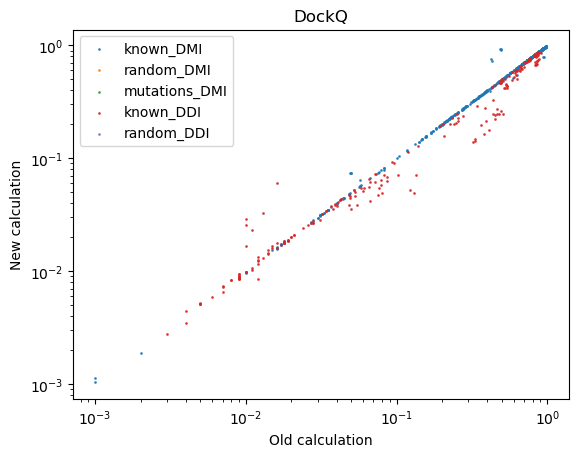

c:\Users\abril\dev\programs\minconda\envs\bachelor01\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


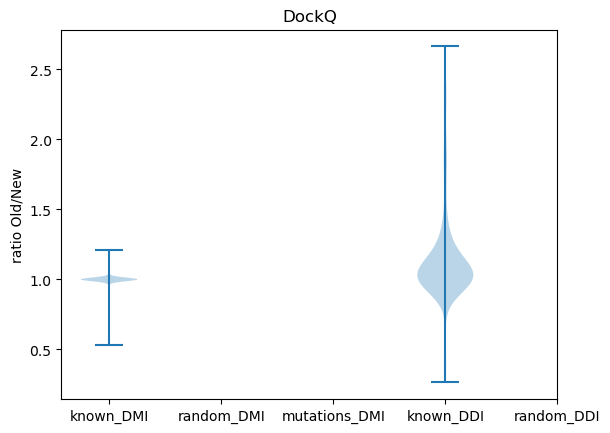

In [54]:
for c in compare_columns:
    ratios = []
    for b in benchmark_sets:
        x, y = RMSD_old[c][b], RMSD_new[c][b]
        ratio = np.array(x)/np.array(y)
        ratio = ratio[np.isfinite(ratio)]
        if len(ratio) == 0:
            ratio = [np.nan, np.nan]
        ratios.append(ratio)
        plt.scatter(x, y, alpha=0.8, s=1, label=b)
    plt.xlabel("Old calculation")
    plt.ylabel("New calculation")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(c)
    plt.legend()
    plt.show()
    
    plt.violinplot(ratios)
    plt.xticks(range(1,len(benchmark_sets)+1), benchmark_sets)
    plt.title(c)
    plt.ylabel("ratio Old/New")
    plt.show()

#### File found

I finally found the file with the DMI chain start and ends. Compare it with my calculated data

In [13]:
data_DMI_dataset = pd.read_excel(path_AF2 / "AF2 DMI result.xlsx", sheet_name="Minimal DMI dataset")
display(data_DMI_dataset)

,dmi_type,regular_expression,pdb_id,methods,organisms,uniprot_motif,uniprot_domain,chain_motif,chain_domain,chain_motif_start,chain_motif_end,chain_domain_start,chain_domain_end,motif_secondary_structure
0,DEG_APCC_KENBOX_2,.KEN.,4GGD,mutation analysis; pull down; x-ray crystallog...,Homo sapiens,O60566,Q12834,D,B,6,10,165,476,L
1,DEG_COP1_1,"[STDE]{1,3}.{0,2}[TSDE].{2,3}VP[STDE]G{0,1}[FL...",5IGO,coimmunoprecipitation; competition binding; fl...,Homo sapiens,Q96RU8,P43254,X,D,354,361,352,675,L
2,DEG_Kelch_Keap1_1,[DNS].[DES][TNS]GE,2FLU,alanine scanning; coimmunoprecipitation; compe...,Homo sapiens,Q16236,Q14145,P,X,77,82,325,609,L
3,DEG_Kelch_Keap1_2,QD.DLGV,3WN7,alanine scanning; glutathione s tranferase tag...,Mus musculus,Q60795,Q9Z2X8,B,A,26,32,324,609,H
4,DEG_MDM2_SWIB_1,"F[^P]{3}W[^P]{2,3}[VIL]",1YCR,fluorescence polarization spectroscopy; isothe...,Homo sapiens,P04637,Q00987,B,A,19,26,30,109,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,LIG_ActinCP_TwfCPI_2,"F.[KR]P..[PAS].{0,3}[RK]",7DS2,colocalization; comigration in non denaturing ...,Mus musculus,Q91YR1,P14315,C,B,323,333,2,244,L
132,LIG_KLC1_Yacidic_2,"[ED].{0,1}[IYVLMTF]Y[LIV][DE]",6FUZ,alanine scanning; coimmunoprecipitation; fluor...,Homo sapiens,Q9UQF2,O88447,A,A,707,711,214,436,L
133,LIG_LYPXL_SIV_4,[PA]Y..[AV][^P]{3}L,2XS1,biosensor; mutation analysis; western blot; x-...,Simian immunodeficiency virus - mac K6W,P05893,Q8WUM4,B,A,44,52,2,698,H
134,TRG_DiLeu_BaEn_1,E..[^P]L[LIVM],4NEE,isothermal titration calorimetry; mutation ana...,HIV-1 M:B_HXB2R,P04601,P62744,C,D,160,165,1,142,L


In [20]:
dataAF_new["ELM_instance"]

0       DEG_APCC_KENBOX_2
1       DEG_APCC_KENBOX_2
2       DEG_APCC_KENBOX_2
3       DEG_APCC_KENBOX_2
4       DEG_APCC_KENBOX_2
              ...        
3175                  NaN
3176                  NaN
3177                  NaN
3178                  NaN
3179                  NaN
Name: ELM_instance, Length: 3180, dtype: object

In [31]:
for i, row in dataAF[dataAF["benchmark_set"] == "known_DMI"].iterrows():
    prediction_name = row["prediction_name"]
    row_ref = data_DMI_dataset[(data_DMI_dataset["dmi_type"] == row["ELM_instance"]) & (data_DMI_dataset["pdb_id"] == row["PDB_id"])]
    if len(row_ref) != 1:
        print(f"\t{bcolors.FAIL}Failed to locate {prediction_name}{bcolors.ENDC}")
        continue

    if row["model_id"] != "ranked_0":
        continue

    if row["chainA_start"] - row_ref["chain_domain_start"].item() != 0:
        print(f'{prediction_name}: Chain A start: {row_ref["chain_domain_start"].item()}-->{row["chainA_start"]}')
    if row["chainA_end"] - row_ref["chain_domain_end"].item() != 0:
        print(f'{prediction_name}: Chain A end: {row_ref["chain_domain_end"].item()}-->{row["chainA_end"]}')

    if row["chainB_start"] - row_ref["chain_motif_start"].item() != 0:
        print(f'{prediction_name}: Chain B start: {row_ref["chain_motif_start"].item()}-->{row["chainB_start"]}')
    if row["chainB_end"] - row_ref["chain_motif_end"].item() != 0:
        print(f'{prediction_name}: Chain B end: {row_ref["chain_motif_end"].item()}-->{row["chainB_end"]}')

LIG_ActinCP_TwfCPI_2_7DS2: Chain A end: 244-->243.0
LIG_deltaCOP1_diTrp_1_5FJX: Chain A end: 546-->544.0
LIG_LRP6_Inhibitor_1_3SOQ: Chain B start: 38-->37.0
LIG_MYND_2_2ODD: Chain A start: 661-->657.0
LIG_MYND_2_2ODD: Chain A end: 701-->707.0
LIG_NRP_CendR_1_2ORZ: Chain B start: 2-->1.0
LIG_Rb_LxCxE_1_1GH6: Chain A start: 644-->645.0
LIG_RPA_C_Vert_1DPU: Chain A start: 164-->172.0
LIG_SUFU_1_4KMD: Chain A end: 475-->415.0
TRG_ER_FFAT_1_2RR3: Chain A end: 129-->128.0


In [ ]:
for i, row in data_DMI_dataset.iterrows():
    row_af = dataAF_new[dataAF_new["prediction_name"] == f"{row['dmi_type']}_{row['pdb_id']}"]
    if len(row_af) != 5:
        print(f"\t{bcolors.FAIL}Failed to locate {row["dmi_type"]}_{row["pdb_id"]}{bcolors.ENDC}")
        continue

    delta_chainA_start = row["chain_motif_start"] - row_af